1.INITIALIZATION

In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as python_random
import tensorflow as tf
import seaborn as sns
import math
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from  tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2. LOADING DATASET

In [29]:
#  input to InceptionV3 is 224x224 with rgb, batch_size=32
IMAGE_SIZE=[299,299]
BATCH_SIZE=32

In [3]:
train_path='F:\\project\\Neurodegen\\Dataset\\Alz-DS\\data\\train'
test_path='F:\\project\\Neurodegen\\Dataset\\Alz-DS\\data\\test'

Importing InceptionV3 library and add preprocesing layer in front of the InceptionV3.

In [30]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [31]:
for layer in base_model.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=conv2d, built=True>
<BatchNormalization name=batch_normalization, built=True>
<Activation name=activation, built=True>
<Conv2D name=conv2d_1, built=True>
<BatchNormalization name=batch_normalization_1, built=True>
<Activation name=activation_1, built=True>
<Conv2D name=conv2d_2, built=True>
<BatchNormalization name=batch_normalization_2, built=True>
<Activation name=activation_2, built=True>
<MaxPooling2D name=max_pooling2d, built=True>
<Conv2D name=conv2d_3, built=True>
<BatchNormalization name=batch_normalization_3, built=True>
<Activation name=activation_3, built=True>
<Conv2D name=conv2d_4, built=True>
<BatchNormalization name=batch_normalization_4, built=True>
<Activation name=activation_4, built=True>
<MaxPooling2D name=max_pooling2d_1, built=True>
<Conv2D name=conv2d_8, built=True>
<BatchNormalization name=batch_normalization_8, built=True>
<Activation name=activation_8, built=True>
<Conv2D name=conv2d_6, built=True>
<Conv2D

In [32]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [33]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_layer False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
acti

In [34]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

BUILDING THE FINAL MODEL

In [35]:
# Create Sequential model
model = Sequential()

# Add InceptionV3 as the base model
model.add(base_model)

# Add Flatten layer to convert 2D features to 1D
model.add(Flatten())

# Add fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add output layer with 4 units and softmax activation for classification
model.add(Dense(4, activation='softmax'))  # Adjust for 4 classes

STRUCTURE OF FINAL MODEL

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,358,500 (211.18 MB)

 Trainable params: 33,555,716 (128.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

SPECIFYING THE COST AND OPTIMIZATION METHODS

In [37]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

USING IMAGE DATA GENERATOR TO IMPORT IMAGE FROM DATASET

In [43]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(299,299),
                                               batch_size=32,
                                               class_mode='categorical')


Found 33984 images belonging to 4 classes.


In [45]:
test_set=test_datagen.flow_from_directory( test_path,
                                            target_size=(299,299),
                                            batch_size=32,
                                            class_mode='categorical')

Found 6400 images belonging to 4 classes.


In [48]:
len(training_set)

1062

In [40]:
from tensorflow.keras.preprocessing import image

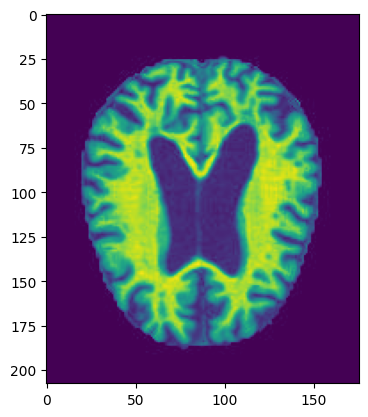

In [42]:
img=image.load_img('F:\\project\\Neurodegen\\Dataset\\Alz-DS\\data\\test\\MildDemented\\27 (10).jpg',target_size=(299,299))

x=image.img_to_array(img)

Z=plt.imread('F:\\project\\Neurodegen\\Dataset\\Alz-DS\\data\\test\\MildDemented\\27 (10).jpg')

plt.imshow(Z)

MODEL FITTING

In [27]:
from tensorflow.keras import backend as K
K.clear_session()

In [47]:
r= model.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=len(training_set) // BATCH_SIZE,
    validation_steps=len(test_set) // BATCH_SIZE
)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2952 - loss: 43.1287 - val_accuracy: 0.5312 - val_loss: 1.3841
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4729 - loss: 1.8620 - val_accuracy: 0.6198 - val_loss: 0.9922
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6019 - loss: 1.2117 - val_accuracy: 0.5260 - val_loss: 1.8374
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6018 - loss: 1.1070 - val_accuracy: 0.4531 - val_loss: 2.0826
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5762 - loss: 1.4954 - val_accuracy: 0.4583 - val_loss: 1.7256
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5863 - loss: 1.5111 - val_accuracy: 0.5156 - val_loss: 1.8558
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 825s 26s/step - accuracy: 0.5763 - loss: 1.4012 - val_accuracy: 0.6198 - val_loss: 0.9520
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6130 - loss: 1.1803 - val_accuracy: 0.5729 - val_lo

PLOTTING LOSSES

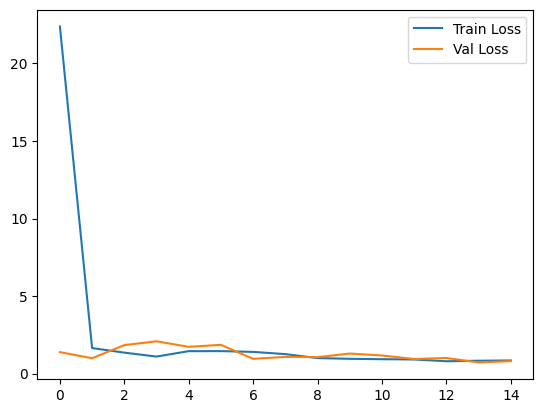

In [49]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

PLOTTING ACCURACY

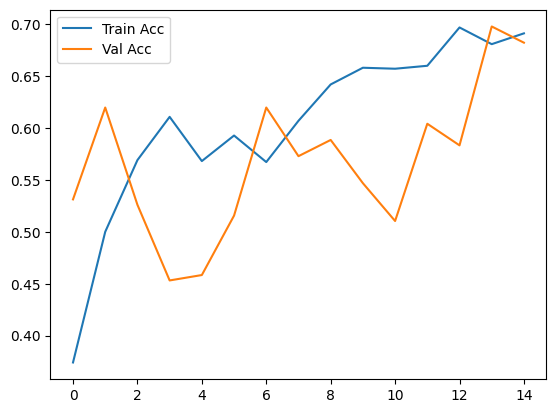

In [50]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

PREDICTIONS

In [51]:
from tensorflow.keras.models import load_model 
model.save('model_InceptionV3.h5')

In [52]:
y_pred=model.predict(test_set)

200/200 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step
